In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,6)
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/matiaga/Fliprobo-Projects/main/datasets/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [20]:
# target variable is fraud report

In [4]:
df.shape

(1000, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
df.columns.to_list()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39']

In [9]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [11]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [12]:
df.drop('_c39',axis=1,inplace=True)

In [27]:
df.drop('policy_bind_date',axis=1,inplace=True)

In [28]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
5,256,39,104594,OH,250/500,1000,1351.10,0,478456,FEMALE,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [29]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

In [30]:
df['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [31]:
df.dropna(axis=0,inplace=True)

In [32]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           909 non-null    int64  
 1   age                          909 non-null    int64  
 2   policy_number                909 non-null    int64  
 3   policy_state                 909 non-null    object 
 4   policy_csl                   909 non-null    object 
 5   policy_deductable            909 non-null    int64  
 6   policy_annual_premium        909 non-null    float64
 7   umbrella_limit               909 non-null    int64  
 8   insured_zip                  909 non-null    int64  
 9   insured_sex                  909 non-null    object 
 10  insured_education_level      909 non-null    object 
 11  insured_occupation           909 non-null    object 
 12  insured_hobbies              909 non-null    object 
 13  insured_relationship     

In [34]:
df['fraud_reported'].value_counts()

fraud_reported
N    668
Y    241
Name: count, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [38]:
df['insured_hobbies']=le.fit_transform(df.insured_hobbies)
df['insured_occupation']=le.fit_transform(df.insured_occupation)
df['insured_education_level']=le.fit_transform(df.insured_education_level)
df['insured_sex']=le.fit_transform(df.insured_sex)
df['policy_csl']=le.fit_transform(df.policy_csl)
df['policy_state']=le.fit_transform(df.policy_state)
df['fraud_reported']=le.fit_transform(df.fraud_reported)
df['auto_model']=le.fit_transform(df.auto_model)
df['auto_make']=le.fit_transform(df.auto_make)
df['police_report_available']=le.fit_transform(df.police_report_available)
df['property_damage']=le.fit_transform(df.property_damage)
df['incident_location']=le.fit_transform(df.incident_location)
df['incident_city']=le.fit_transform(df.incident_city)
df['incident_state']=le.fit_transform(df.incident_state)
df['authorities_contacted']=le.fit_transform(df.authorities_contacted)
df['incident_severity']=le.fit_transform(df.incident_severity)
df['collision_type']=le.fit_transform(df.collision_type)
df['incident_type']=le.fit_transform(df.incident_type)
df['incident_date']=le.fit_transform(df.incident_date)
df['insured_relationship']=le.fit_transform(df.insured_relationship)


In [39]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,2,1,63400,6340,6340,50720,3,34,2014,1
5,256,39,104594,2,1,1000,1351.10,0,478456,0,...,2,1,64100,6410,6410,51280,10,3,2003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [40]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

months_as_customer                Axes(0.125,0.747241;0.0824468x0.132759)
age                            Axes(0.223936,0.747241;0.0824468x0.132759)
policy_number                  Axes(0.322872,0.747241;0.0824468x0.132759)
policy_state                   Axes(0.421809,0.747241;0.0824468x0.132759)
policy_csl                     Axes(0.520745,0.747241;0.0824468x0.132759)
policy_deductable              Axes(0.619681,0.747241;0.0824468x0.132759)
policy_annual_premium          Axes(0.718617,0.747241;0.0824468x0.132759)
umbrella_limit                 Axes(0.817553,0.747241;0.0824468x0.132759)
insured_zip                       Axes(0.125,0.587931;0.0824468x0.132759)
insured_sex                    Axes(0.223936,0.587931;0.0824468x0.132759)
insured_education_level        Axes(0.322872,0.587931;0.0824468x0.132759)
insured_occupation             Axes(0.421809,0.587931;0.0824468x0.132759)
insured_hobbies                Axes(0.520745,0.587931;0.0824468x0.132759)
insured_relationship           Axes(0.

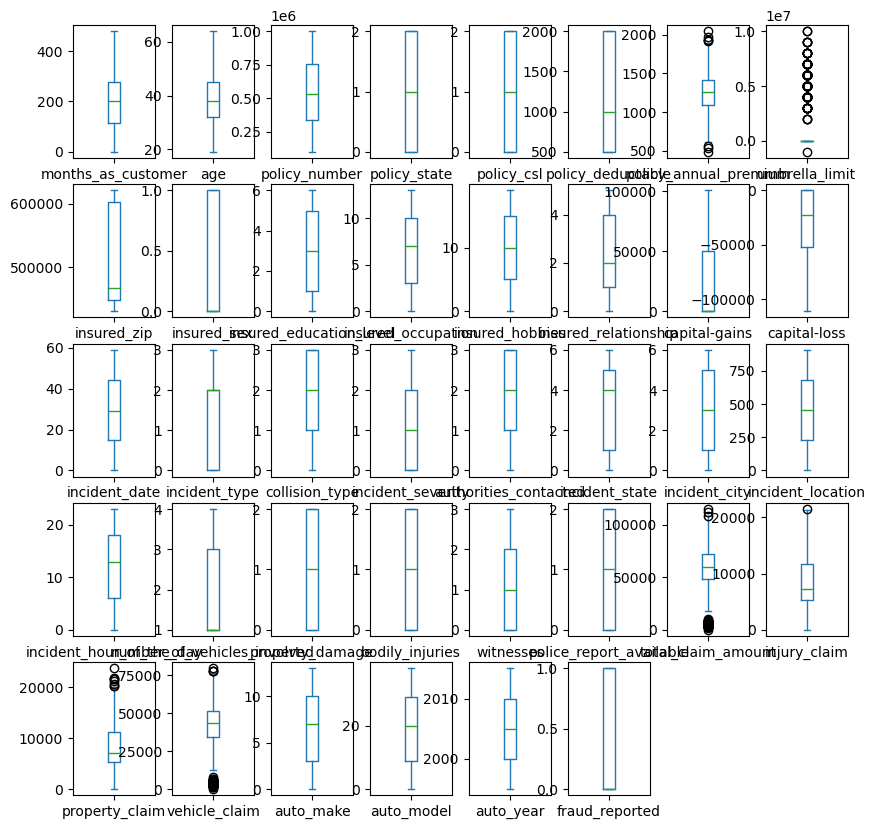

In [44]:
df.plot(kind='box',subplots=True,layout=(5,8),figsize=(10,10))

In [45]:
from scipy.stats import zscore

In [46]:
z=np.abs(zscore(df))

In [47]:
z

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,1.060663,0.975208,0.095633,1.190326,0.080621,0.214942,0.613265,0.477722,0.482463,1.091037,...,0.466601,1.270407,0.619434,0.344910,1.088927,0.661039,0.859561,1.635270,0.187267,1.664868
1,0.198143,0.322116,0.793358,0.011903,0.080621,1.420055,0.242257,1.717674,0.453850,1.091037,...,1.334420,1.189231,2.303278,1.587191,1.600925,2.328924,0.363943,0.647947,0.311928,1.664868
2,0.612627,1.092918,0.552885,1.190326,1.161493,1.420055,0.638683,1.717674,0.979414,0.916559,...,1.367111,0.040588,1.004002,0.086914,0.926264,1.122966,0.627291,0.967674,0.311928,0.600648
3,0.439648,0.213267,1.242550,1.214133,0.080621,1.420055,0.649291,2.156754,1.505131,0.916559,...,0.466601,0.040588,0.258817,0.381766,0.379064,0.577318,0.875100,1.326701,1.476715,1.664868
5,0.439648,0.004431,1.723599,1.190326,0.080621,0.214942,0.385564,0.477722,0.309944,0.916559,...,0.466601,0.040588,0.289563,0.366590,0.363681,0.611791,0.859561,1.455757,0.353665,1.664868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.742529,0.113279,1.545119,1.190326,1.322735,0.214942,0.221142,0.477722,0.970217,0.916559,...,0.433909,1.189231,1.304211,2.024747,0.143963,1.212616,0.131674,1.186487,0.145530,0.600648
996,0.689779,0.213267,1.402137,1.214133,1.161493,0.214942,0.735174,0.477722,1.505971,0.916559,...,1.367111,1.189231,2.238916,2.163501,2.200909,1.907011,1.602987,0.788161,1.643113,0.600648
997,0.647128,0.548674,1.454017,1.190326,0.080621,1.032440,0.517713,0.839516,0.809121,0.916559,...,1.367111,1.270407,0.438905,0.130275,0.124143,0.686894,1.107369,0.019650,1.518452,0.600648
998,2.181940,2.499090,0.047398,1.214133,1.322735,1.420055,0.409309,1.717674,0.824281,1.091037,...,0.433909,1.270407,0.462418,0.624586,0.625194,0.295601,1.370717,1.276244,1.185655,0.600648


In [48]:
threshod=3
print(np.where(z>3))

(array([ 28,  44,  97, 101, 201, 230, 279, 384, 408, 448, 451, 536, 599,
       639, 697, 796, 836, 885], dtype=int64), array([ 7,  7,  7,  7,  6,  7,  7,  7,  7, 32,  7, 32,  7,  7,  6,  7,  7,
        7], dtype=int64))


In [49]:
df_new=df[(z<3).all(axis=1)]

In [50]:
df_new

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,2,1,63400,6340,6340,50720,3,34,2014,1
5,256,39,104594,2,1,1000,1351.10,0,478456,0,...,2,1,64100,6410,6410,51280,10,3,2003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,1,2,46980,5220,5220,36540,1,5,1998,0


<Axes: >

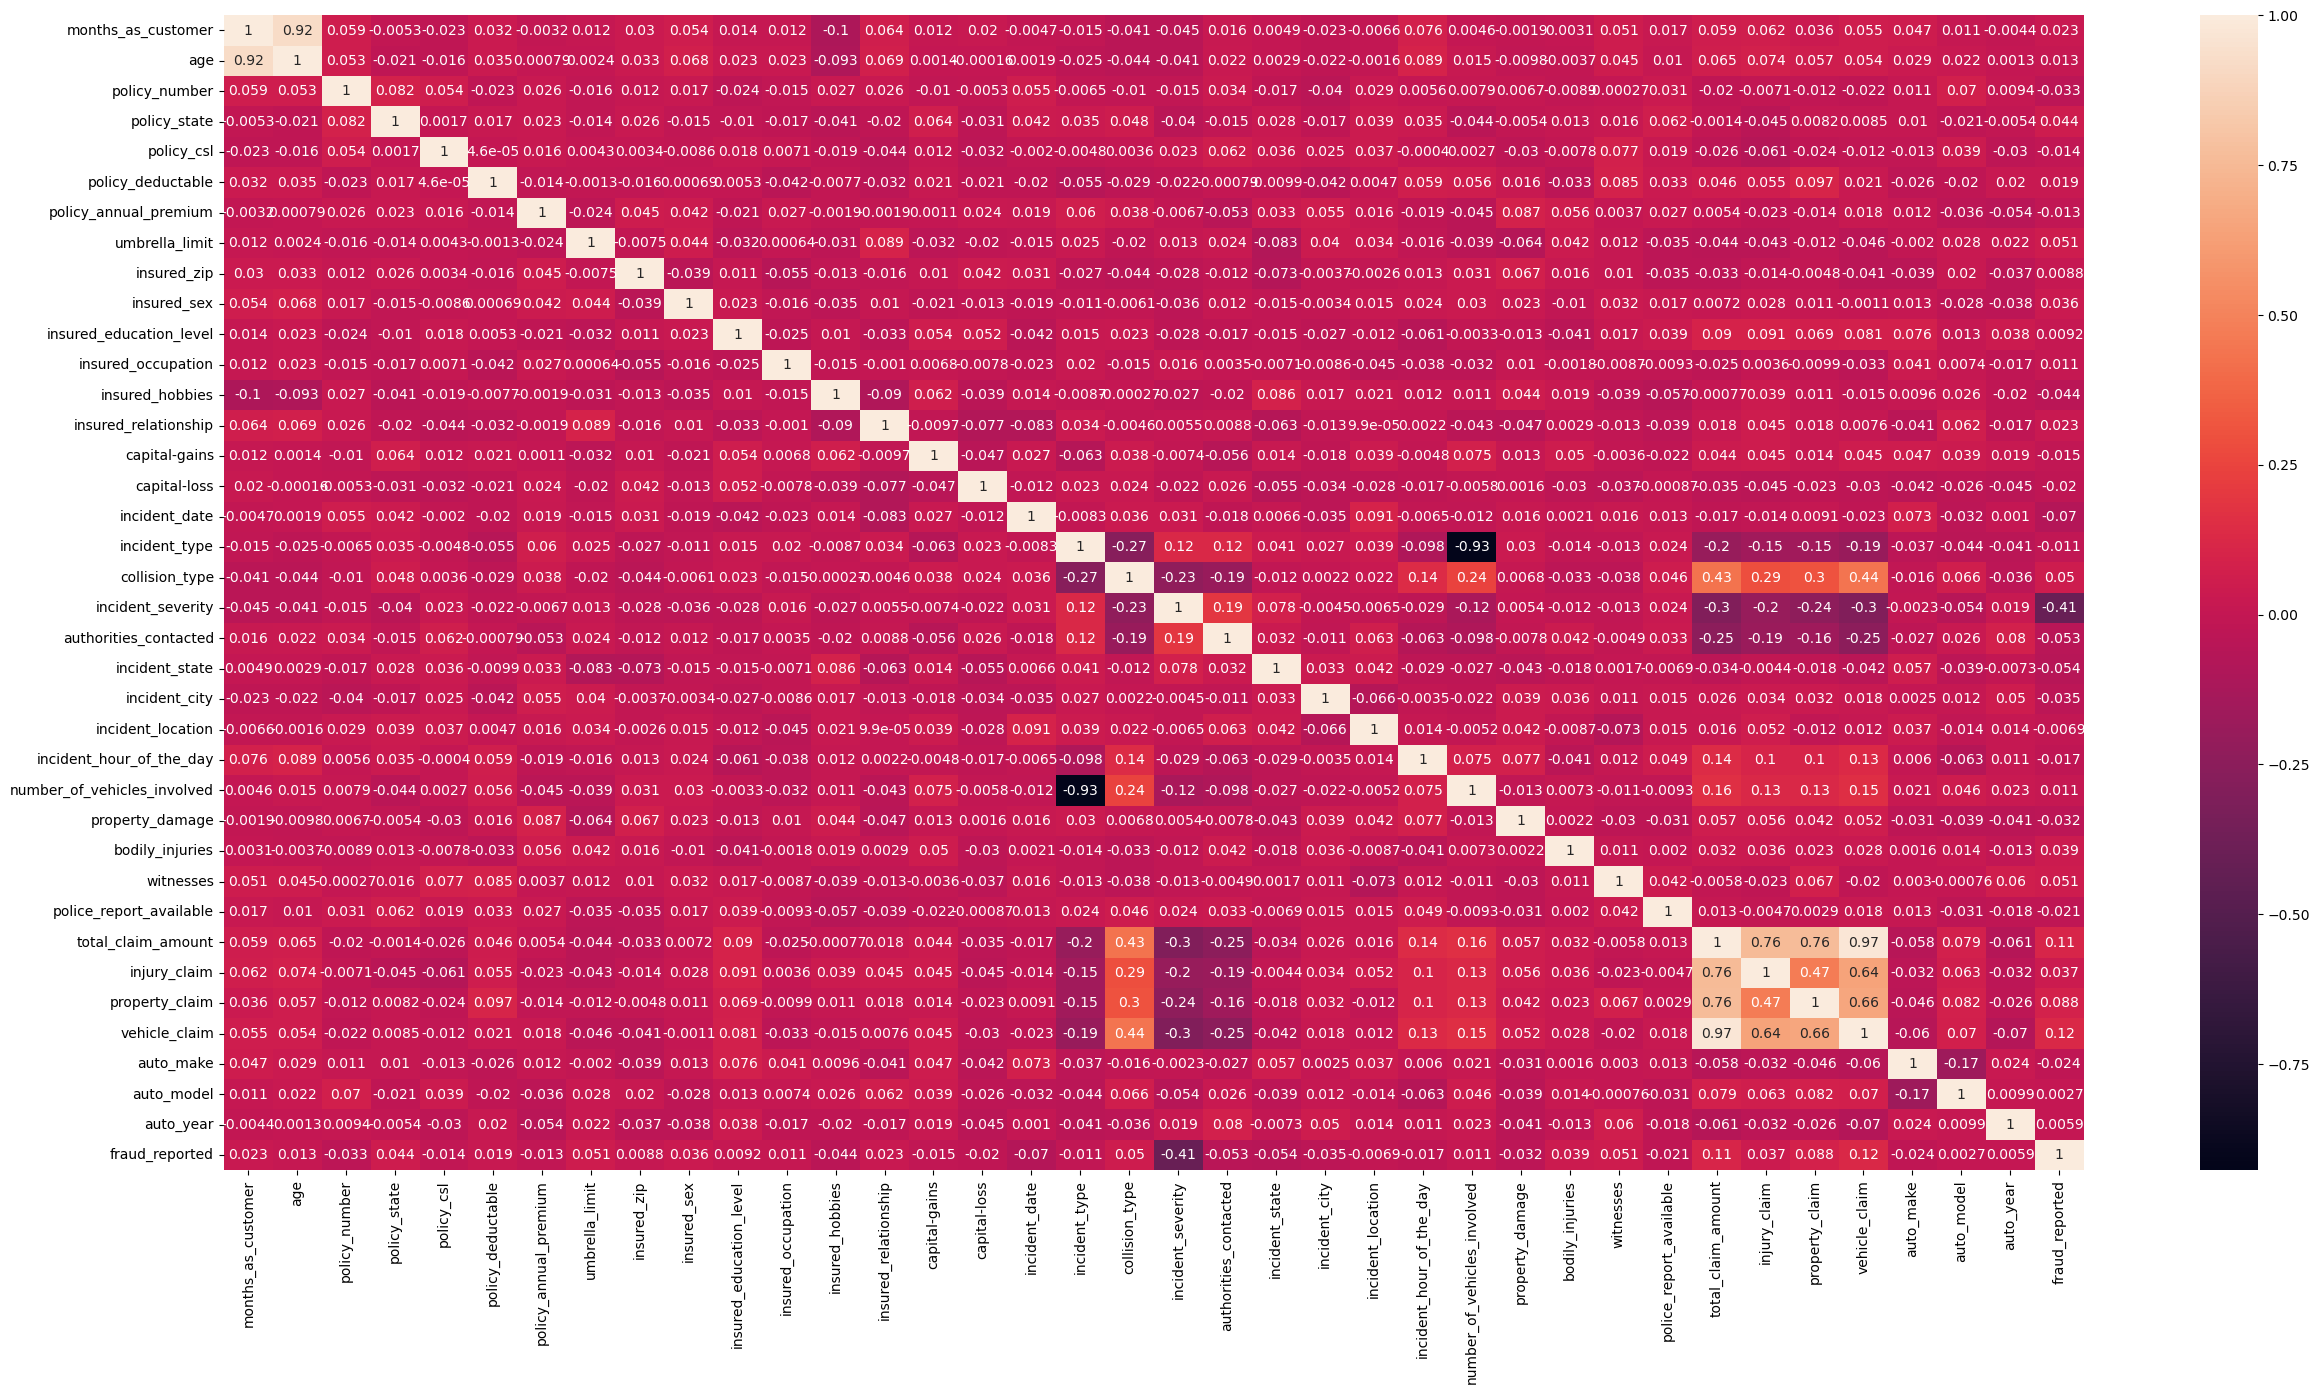

In [76]:
plt.figure(figsize=(30,15))
sns.heatmap(df_new.corr(),annot=True)

In [78]:
df_new.drop('incident_severity',axis=1,inplace=True)

In [80]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           891 non-null    int64  
 1   age                          891 non-null    int64  
 2   policy_number                891 non-null    int64  
 3   policy_state                 891 non-null    int64  
 4   policy_csl                   891 non-null    int64  
 5   policy_deductable            891 non-null    int64  
 6   policy_annual_premium        891 non-null    float64
 7   umbrella_limit               891 non-null    int64  
 8   insured_zip                  891 non-null    int64  
 9   insured_sex                  891 non-null    int64  
 10  insured_education_level      891 non-null    int64  
 11  insured_occupation           891 non-null    int64  
 12  insured_hobbies              891 non-null    int64  
 13  insured_relationship     

# training data for prediction

In [81]:
x=df_new.iloc[:,0:-1]

In [82]:
y=df_new.iloc[:,-1]

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [84]:
x_train.shape

(623, 36)

In [85]:
y_train.shape

(623,)

In [86]:
lg=LogisticRegression()

In [87]:
lg.fit(x_train,y_train)

LogisticRegression()

In [88]:
pred=lg.predict(x_test)

In [89]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [90]:
print(accuracy_score(y_test,pred))

0.7835820895522388


In [91]:
print(confusion_matrix(y_test,pred))

[[209   0]
 [ 58   1]]


In [92]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       209
           1       1.00      0.02      0.03        59

    accuracy                           0.78       268
   macro avg       0.89      0.51      0.46       268
weighted avg       0.83      0.78      0.69       268

